# Customer Segmentation using K-Means and Hierarchical Clustering

## Overview

Customer segmentation is a critical strategy in marketing that involves dividing a company's customer base into distinct groups based on common characteristics. This allows businesses to tailor their marketing strategies effectively to different customer needs, improving customer satisfaction and driving sales.

In this project, we utilize clustering techniques such as **K-Means** and **Hierarchical Clustering** to segment customers based on their purchasing behavior. The analysis is conducted on the <a href="https://archive.ics.uci.edu/ml/datasets/online+retail">Online Retail Dataset</a>, which includes transactions from a UK-based online retailer.

### Objectives

- **Explore** the dataset to understand customer behavior.
- **Clean** and preprocess the data to ensure accuracy.
- **Apply** clustering algorithms to segment customers.
- **Interpret** the resulting clusters to derive actionable business insights.

### Tools and Libraries

- **Python**: Programming language used for analysis.
- **Pandas**: Data manipulation and analysis.
- **NumPy**: Numerical operations.
- **Matplotlib & Seaborn**: Data visualization.
- **Scikit-learn**: Machine learning algorithms and preprocessing.
- **SciPy**: Hierarchical clustering and dendrograms.


## Table of Contents

1. [Data Loading and Initial Inspection](#Data-Loading-and-Initial-Inspection)
2. [Data Cleaning](#Data-Cleaning)
3. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
4. [Data Preparation for Modeling](#Data-Preparation-for-Modeling)
5. [Clustering Modeling](#Clustering-Modeling)
6. [Cluster Interpretation and Visualization](#Cluster-Interpretation-and-Visualization)
7. [Conclusion](#Conclusion)


## Data Loading and Initial Inspection

### Importing Libraries

We begin by importing the necessary libraries for data manipulation, visualization, and modeling.

### Loading the Dataset

The dataset `Online Retail.csv` contains all transactions occurring between December 1, 2010, and December 9, 2011, for a UK-based online retailer. Each row represents a transaction with details such as invoice number, stock code, description, quantity, invoice date, unit price, customer ID, and country.

### Initial Data Inspection

Let's take a look at the first few rows of the dataset to understand its structure and contents.


In [1]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import datetime as dt

%matplotlib inline

In [3]:
# preprocessing and modelling libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [4]:
# read the dataset
retail_df = pd.read_csv("Online+Retail.csv", sep=",", encoding="ISO-8859-1", header=0)
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
# check the shape of the data
retail_df.shape

(541909, 8)

In [6]:
# check the statistical summary
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
# check some information of the dataframe
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


- **The initial inspection reveals that the dataset contains 541,909 transactions with 8 columns, including some missing values in the `Description` and `CustomerID` columns. The `Quantity` and `UnitPrice` columns have a wide range of values, indicating potential outliers.**

## Data Cleaning

### Handling Missing Values

Missing values can skew the analysis and lead to inaccurate clustering results. We assess the dataset for missing values and decide on appropriate strategies to handle them.

### Handling Outliers

We identified and removed outliers in `Quantity` and `UnitPrice` using the Interquartile Range (IQR) method to refine the dataset and improve the accuracy of subsequent analyses.

### Removing Duplicates

Duplicate records can distort the analysis by overrepresenting certain transactions. We identify and remove any duplicate entries to ensure data integrity.

### Creating Derived Features

We create a new feature, `Amount`, representing the total revenue from each transaction by multiplying `Quantity` and `UnitPrice`. This will be useful for the monetary aspect of the RFM model.

In [8]:
# check for missing values
round(100*(retail_df.isnull().sum())/len(retail_df), 2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [9]:
# drop all rows containing missing values
retail_df = retail_df.dropna()
retail_df.shape

(406829, 8)

In [10]:
# check for negative values in 'Quantity' and 'UnitPrice'
negative_quantity = retail_df[retail_df['Quantity'] < 0]
negative_unitprice = retail_df[retail_df['UnitPrice'] < 0]

# display the rows with negative 'Quantity'
print(f"Rows with negative Quantity: {negative_quantity.shape[0]}")

# display the rows with negative 'UnitPrice'
print(f"Rows with negative UnitPrice: {negative_unitprice.shape[0]}")

Rows with negative Quantity: 8905
Rows with negative UnitPrice: 0


In [11]:
# remove negative quantities
retail_df = retail_df[retail_df['Quantity'] > 0]

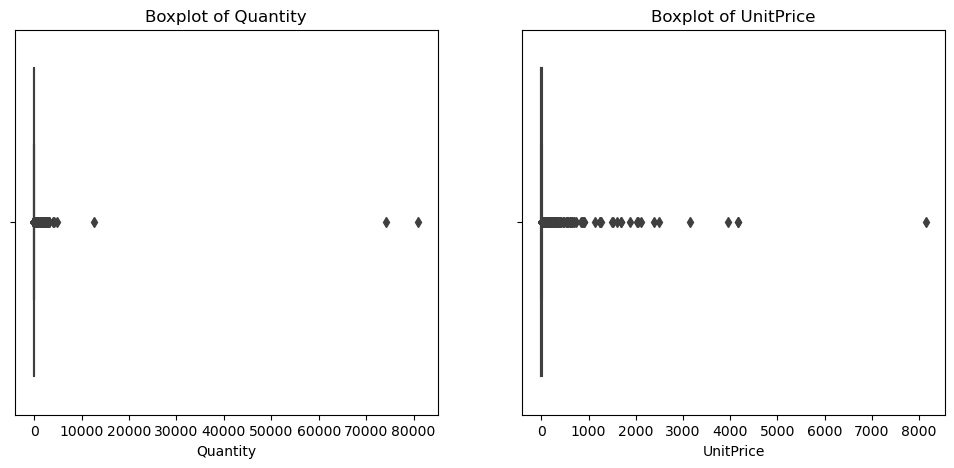

In [12]:
# plot boxplots for 'Quantity' and 'UnitPrice'
plt.figure(figsize=(12, 5))

# boxplot for 'Quantity'
plt.subplot(1, 2, 1)
sns.boxplot(x=retail_df['Quantity'])
plt.title('Boxplot of Quantity')

# boxplot for 'UnitPrice'
plt.subplot(1, 2, 2)
sns.boxplot(x=retail_df['UnitPrice'])
plt.title('Boxplot of UnitPrice')

plt.show()

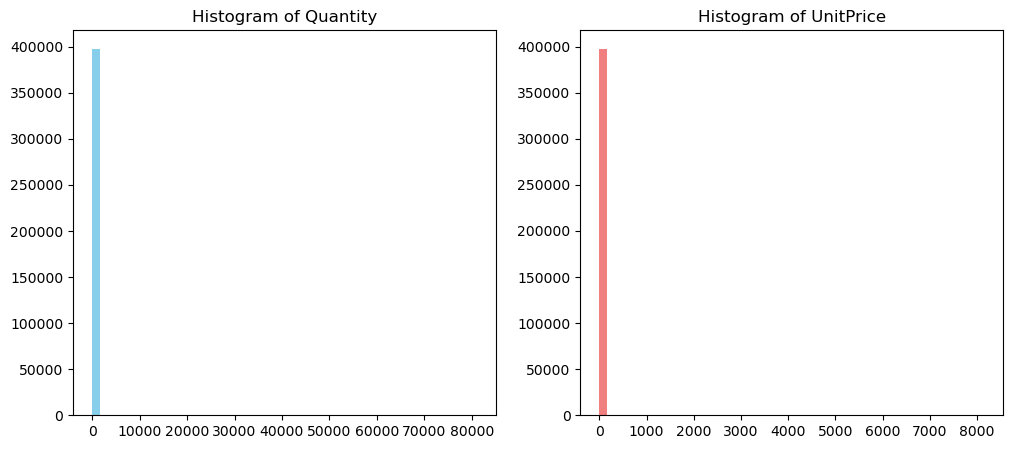

In [13]:
# plot histograms for 'Quantity' and 'UnitPrice'
plt.figure(figsize=(12, 5))

# histogram for 'Quantity'
plt.subplot(1, 2, 1)
plt.hist(retail_df['Quantity'], bins=50, color='skyblue')
plt.title('Histogram of Quantity')

# histogram for 'UnitPrice'
plt.subplot(1, 2, 2)
plt.hist(retail_df['UnitPrice'], bins=50, color='lightcoral')
plt.title('Histogram of UnitPrice')

plt.show()

- **Based on the visualizations, the columns contain significant outliers and need to be handled.**

In [14]:
# define function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# remove outliers in 'Quantity' and 'UnitPrice'
retail_df = remove_outliers(retail_df, 'Quantity')
retail_df = remove_outliers(retail_df, 'UnitPrice')

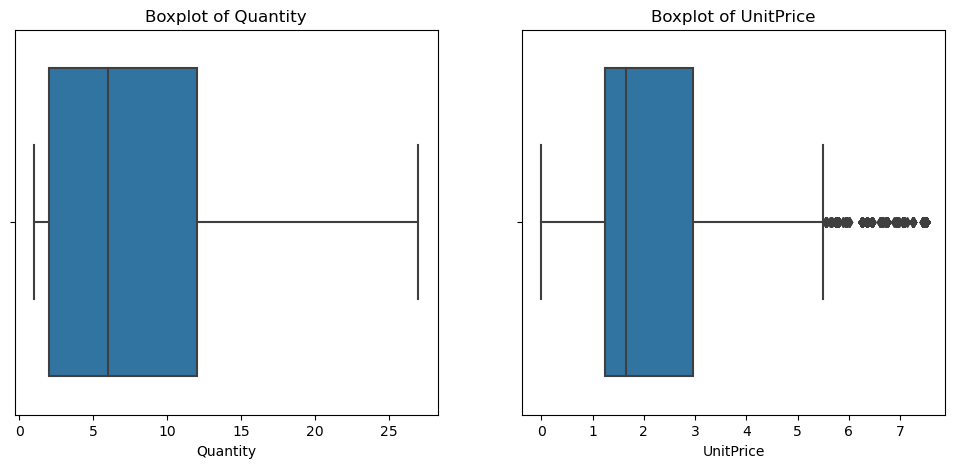

In [15]:
# plot boxplots for 'Quantity' and 'UnitPrice' again for confirmation
plt.figure(figsize=(12, 5))

# boxplot for 'Quantity'
plt.subplot(1, 2, 1)
sns.boxplot(x=retail_df['Quantity'])
plt.title('Boxplot of Quantity')

# boxplot for 'UnitPrice'
plt.subplot(1, 2, 2)
sns.boxplot(x=retail_df['UnitPrice'])
plt.title('Boxplot of UnitPrice')

plt.show()

In [16]:
# check for duplicate values
retail_df.duplicated().sum()

4917

In [17]:
# drop duplicates
retail_df.drop_duplicates(inplace=True)

In [18]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [19]:
# create a new column: 'Amount'
retail_df['Amount'] = retail_df['Quantity'] * retail_df['UnitPrice'] 
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


- **We addressed missing values by dropping rows with missing `Description` and `CustomerID`. Negative values in `Quantity` were removed, and outliers were handled using IQR. Duplicate records were also removed, and a new `Amount` feature was created to represent transaction revenue.**

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis helps us understand the underlying patterns and distributions in the data. In this section, we perform various analyses to gain insights into customer behavior and sales trends.

### Descriptive Statistics

We start by generating descriptive statistics for the numerical columns to understand their central tendencies and dispersion.

### Distribution of Numerical Features

Visualizing the distributions of `Quantity`, `UnitPrice`, `CustomerID`, and `Amount` provides insights into the spread and skewness of these variables.

### Top 10 Products by Total Sales

Identifying the top-selling products helps in understanding product popularity and revenue generation.

### Time-Based Sales Analysis

Analyzing sales trends over time (monthly and hourly) reveals seasonal patterns and peak sales periods.

### Country-wise Distribution

Understanding the geographic distribution of customers can inform targeted marketing strategies.

### Pareto Analysis

Applying the Pareto principle (80/20 rule) helps identify the top customers contributing to the majority of sales.

### Correlation Analysis

Examining the correlation between numerical features reveals relationships that can influence clustering.


In [20]:
# Descriptive statistics for the numeric columns
retail_df.describe()

,Quantity,UnitPrice,CustomerID,Amount
count,333265.000000,333265.000000,333265.000000,333265.000000
mean,7.550568,2.194014,15318.810544,12.901073
std,6.777327,1.546087,1711.210934,13.214938
min,1.000000,0.000000,12347.000000,0.000000
25%,2.000000,1.250000,13988.000000,3.900000
50%,6.000000,1.650000,15235.000000,10.140000
75%,12.000000,2.950000,16814.000000,17.400000
max,27.000000,7.500000,18287.000000,178.800000


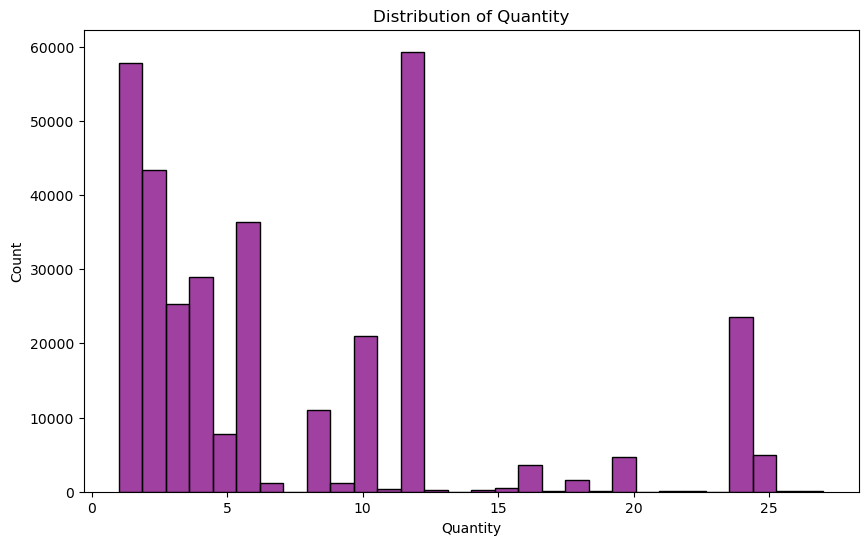

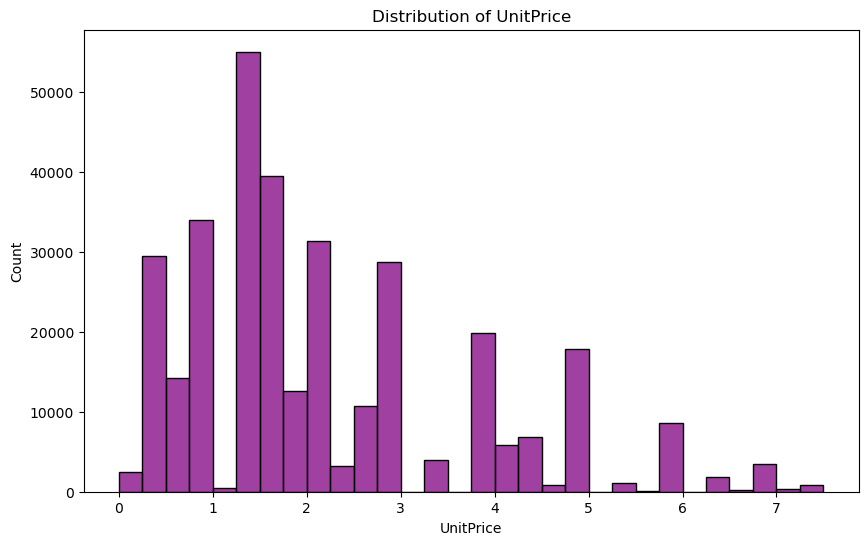

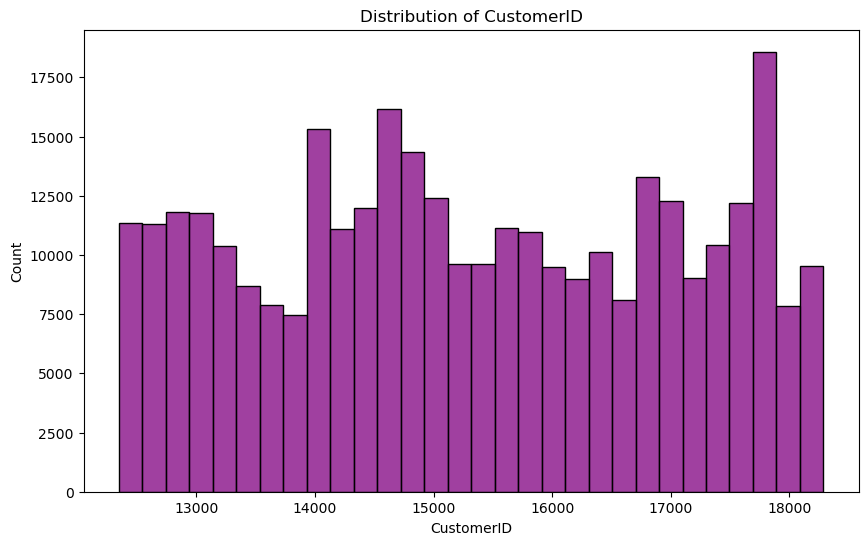

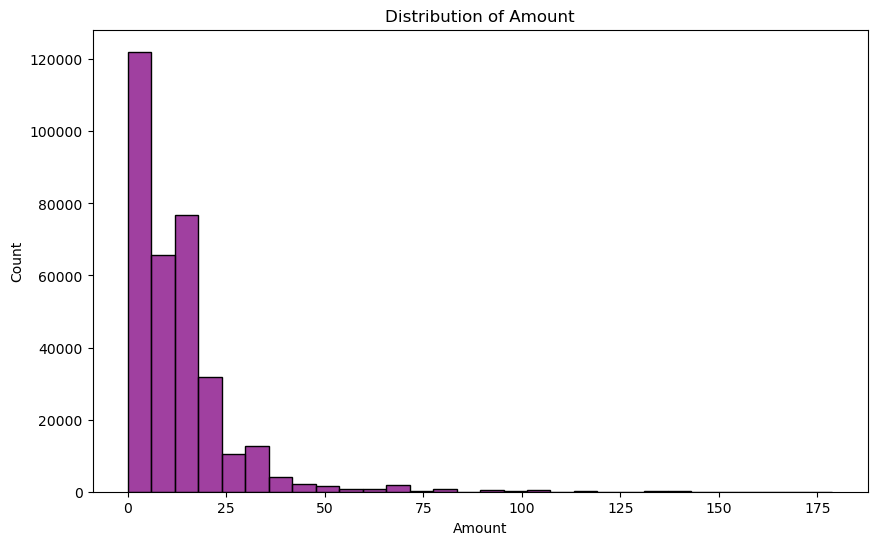

In [21]:
# summary statistics
summary_stats = retail_df.describe()

# sisualize the distributions of numerical features
for column in retail_df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(retail_df[column], bins=30, kde=False, color='purple')
    plt.title(f'Distribution of {column}')
    plt.show()

**Inference:** 

The distribution plots uncover distinct customer segments based on purchasing behavior.

* **Quantity Segmentation:** The skewed distribution of quantity suggests the presence of a significant portion of bulk buyers, potentially indicating wholesale customers or those stocking up on products. This segment could be targeted with larger package sizes, quantity discounts, or specialized offers.
* **Price Sensitivity Segmentation:** The relatively uniform distribution of price might suggest a mix of price-sensitive and less price-sensitive customers. Analyzing the relationship between price and quantity could further refine this segmentation, identifying customers who are more likely to purchase larger quantities at lower prices.
* **Spending Habit Segmentation:** The distribution of total spend reveals a range of customer spending habits, from low-spending individuals to high-value customers. This segmentation can inform targeted marketing efforts, such as personalized product recommendations or exclusive offers for high-spending customers.
* **Customer Segmentation Opportunities:** The diverse patterns observed in quantity, price, and total spend suggest that a multi-dimensional clustering approach could effectively segment customers into distinct groups. This segmentation could be used to tailor marketing messages, personalize product recommendations, and optimize customer experiences.

By leveraging these insights, the business can develop more targeted marketing strategies and improve customer satisfaction and loyalty.

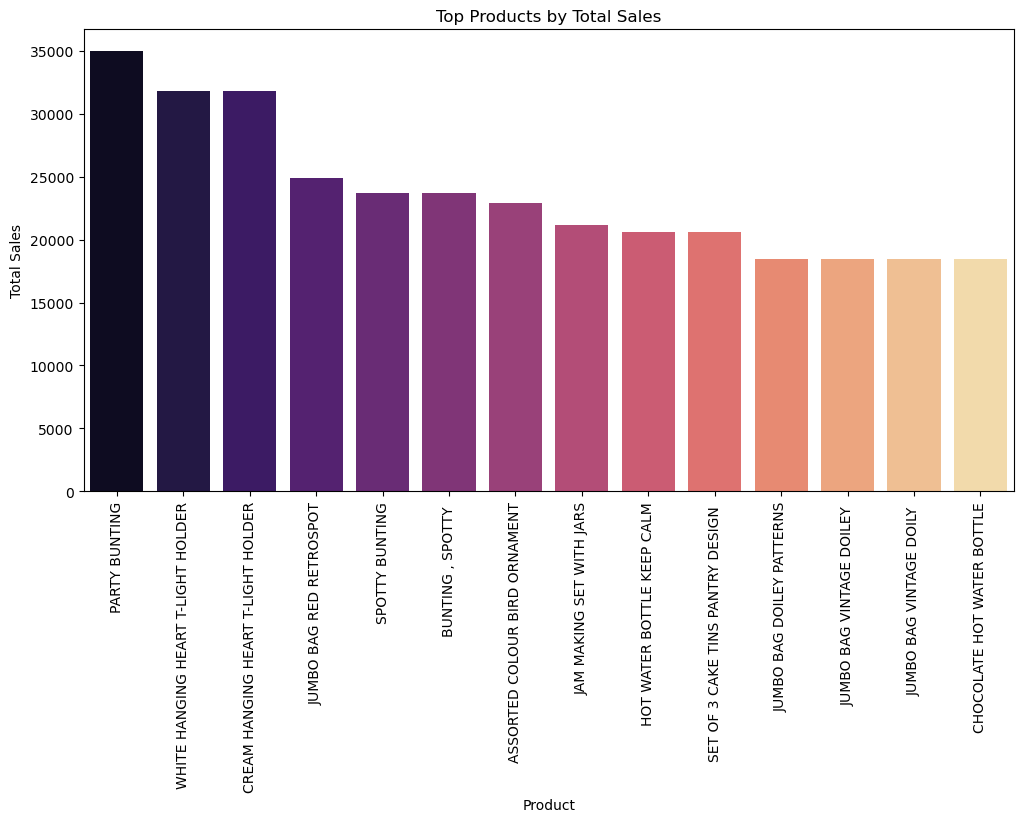

In [22]:
# group by product (StockCode) and sum up the Amount
product_sales = retail_df.groupby('StockCode')['Amount'].sum().reset_index()

# sort the data by Amount in descending order
product_sales = product_sales.sort_values(by='Amount', ascending=False).head(10)

# merge with product descriptions
product_sales = pd.merge(product_sales, retail_df[['StockCode', 'Description']].drop_duplicates(), on='StockCode', how='left')

# plot the top 10 products
plt.figure(figsize=(12,6))
sns.barplot(x='Description', y='Amount', data=product_sales, palette='magma')
plt.title('Top Products by Total Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

**Inference:**

The bar chart reveals a clear hierarchy in product popularity based on total sales. 

* **Dominant Product:** Party Bunting stands out as the undisputed top seller, significantly outperforming the rest of the product lineup.
* **Product Clusters:** The remaining products can be grouped into two tiers:
    * **High-Performing Products:** The next three products (White Hanging Heart T-Light Holders, Cream Hanging Heart T-Light Holders, and Jumbo Bag Red Retrospot) demonstrate consistent sales, forming a strong second tier.
    * **Mid-Range Products:** The remaining products in the top 10 exhibit moderate sales, suggesting a more competitive landscape.
* **Product Categories:** The dominance of decorative and lighting products, particularly hanging heart t-light holders, suggests a strong market demand for these items.

These insights can be leveraged to optimize inventory management, marketing strategies, and product development efforts. For instance, the company could focus on promoting the top-selling products, while exploring opportunities to increase sales for mid-range items or introduce new products in the same categories.


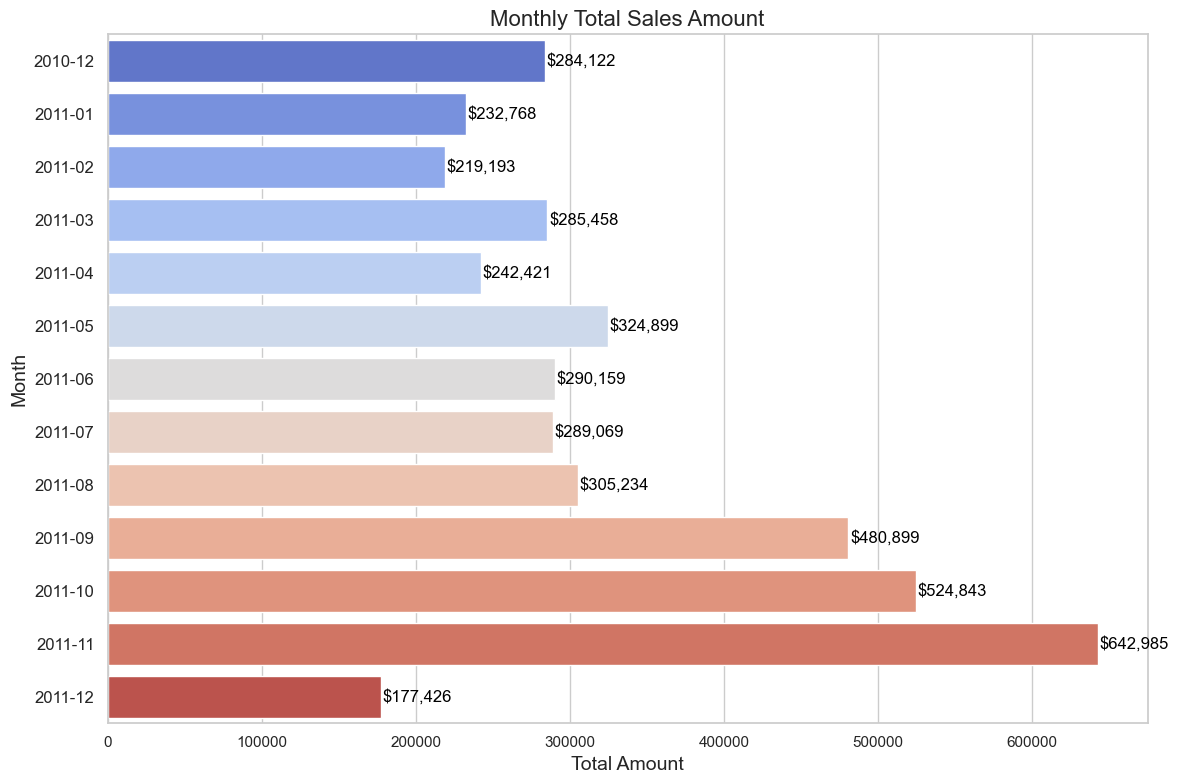

In [23]:
# convert InvoiceDate to datetime
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], format = '%d-%m-%Y %H:%M')

# group by the month of the InvoiceDate and sum the Amount
monthly_amount = retail_df.groupby(retail_df['InvoiceDate'].dt.to_period('M'))['Amount'].sum()

# set the figure size and style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# create the horizontal bar plot
ax = sns.barplot(
    x=monthly_amount.values, 
    y=monthly_amount.index.astype(str),  # convert Period to string for display
    palette="coolwarm",  
    orient='h')

plt.title('Monthly Total Sales Amount', fontsize=16)
plt.xlabel('Total Amount', fontsize=14)
plt.ylabel('Month', fontsize=14)

plt.yticks(rotation=0, fontsize=12)

for i, v in enumerate(monthly_amount.values):
    ax.text(v + 1000, i, f'${v:,.0f}', color='black', va='center', fontsize=12)

plt.tight_layout()
plt.show()

**Inference:** 

Based on the bar plot, there is a clear trend of increasing sales from 2010-12 to 2011-11, with a peak in sales in 2011-11. However, there is a significant drop in sales in 2011-12. This could be due to various factors such as seasonal fluctuations, economic conditions, or changes in marketing strategies. Further analysis is needed to understand the underlying causes of this trend.

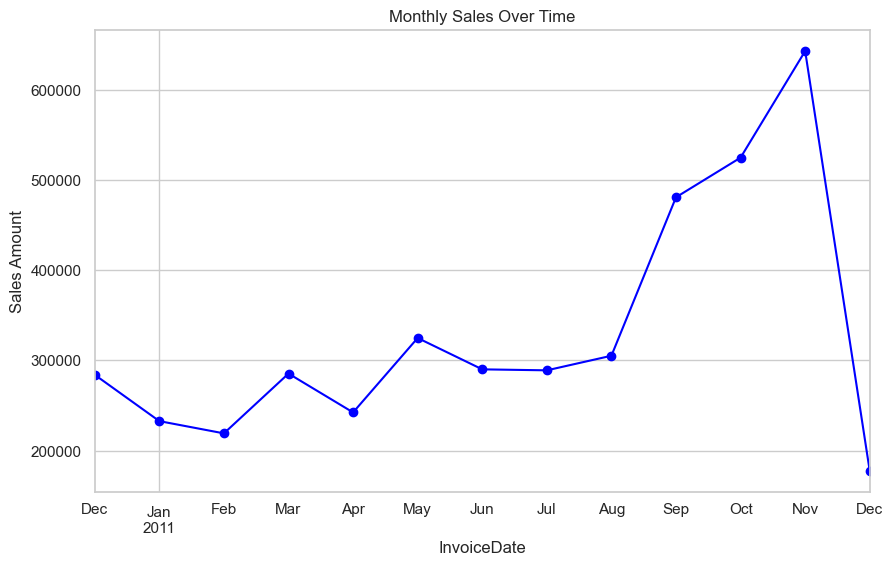

In [24]:
# resample to monthly sales and plot
monthly_sales = retail_df.resample('M', on='InvoiceDate')['Amount'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', color='blue', marker='o')
plt.title('Monthly Sales Over Time')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.show()

**Inference:**

Based on the line plot, there is a general trend of increasing sales from December 2010 to October 2011. However, there are fluctuations throughout the year, with some months showing significant increases or decreases in sales. The most notable peak in sales occurs in November 2011, followed by a sharp decline in December 2011. This could be attributed to various factors such as seasonal trends, economic conditions, or marketing campaigns. Further analysis is needed to understand the underlying causes of these fluctuations.


<Figure size 1600x1000 with 0 Axes>

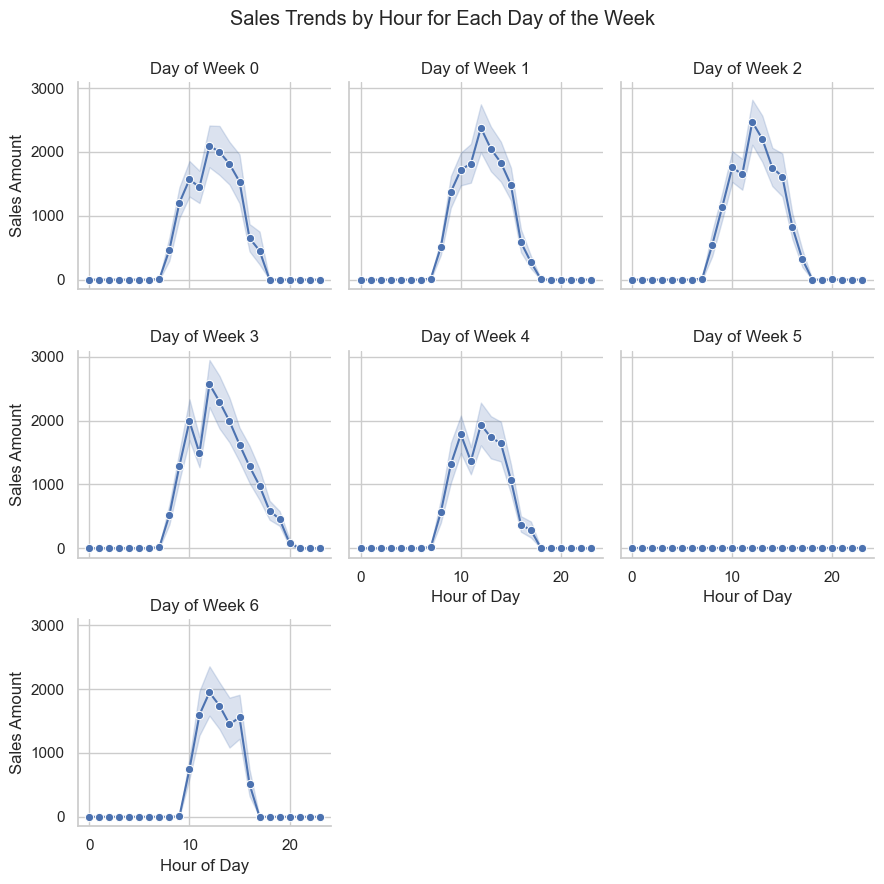

In [25]:
# resample to hourly sales and reset index
grouped_sales = retail_df.resample('H', on='InvoiceDate')['Amount'].sum().reset_index()

# extract day of week and hour from the resampled data
grouped_sales['DayOfWeek'] = grouped_sales['InvoiceDate'].dt.dayofweek
grouped_sales['Hour'] = grouped_sales['InvoiceDate'].dt.hour

# plot sales trends by day of week and hour
plt.figure(figsize=(16, 10))

# create a FacetGrid with one plot per day of the week
g = sns.FacetGrid(grouped_sales, col='DayOfWeek', col_wrap=3, sharex=True, sharey=True)
g.map(sns.lineplot, 'Hour', 'Amount', marker='o')

# set axis labels and titles
g.set_axis_labels('Hour of Day', 'Sales Amount')
g.set_titles(col_template='Day of Week {col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Sales Trends by Hour for Each Day of the Week')

plt.show()

**Inference:**

Based on the facet plot, there are distinct patterns in sales trends across different days of the week. 

* **Peak Sales:** The majority of days exhibit peak sales between the hours of 10 and 15. This suggests that the busiest time for sales is typically during the late morning and early afternoon.
* **Weekday Patterns:** Weekdays (Day of Week 0-5) generally show a similar pattern, with a clear peak in sales during the middle of the day.
* **Weekend Patterns:** Weekends (Day of Week 6) tend to have a more spread-out sales pattern, with lower overall sales compared to weekdays. There might be a slight peak in sales during the afternoon or evening hours.

Overall, the plot indicates that the busiest time for sales is typically during the middle of the week and weekdays, with a more relaxed sales pattern on weekends.


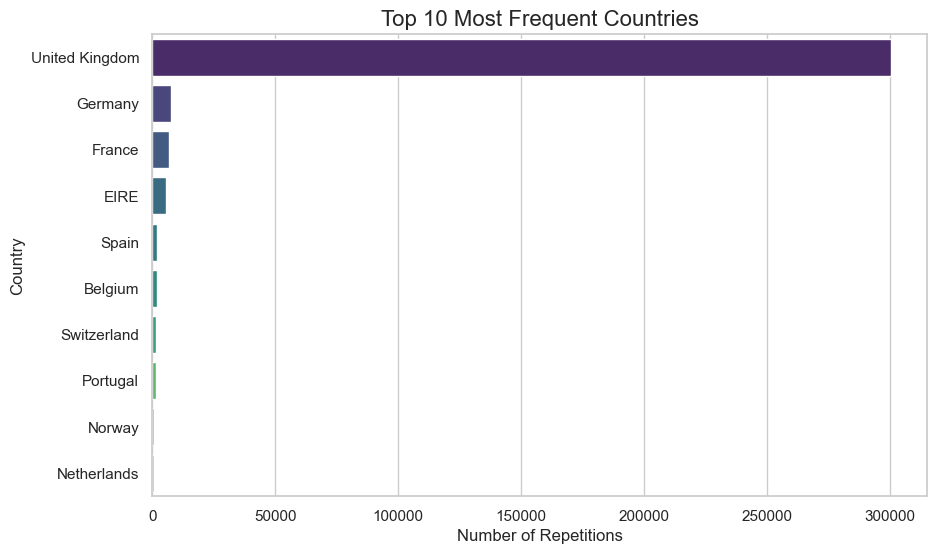

In [26]:
# barplot for country
country_count = retail_df.Country.value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=country_count.values, y=country_count.index, palette='viridis')
plt.title("Top 10 Most Frequent Countries", fontsize=16)
plt.xlabel("Number of Repetitions")
plt.ylabel("Country")
plt.show()

**Inference:**

Based on the bar plot, the United Kingdom is the most frequently occurring country in the dataset, followed by Germany, France, and EIRE. The other countries in the top 10 have significantly lower frequencies. This suggests that a majority of the data points are associated with customers from the United Kingdom, while the remaining countries have relatively fewer occurrences.


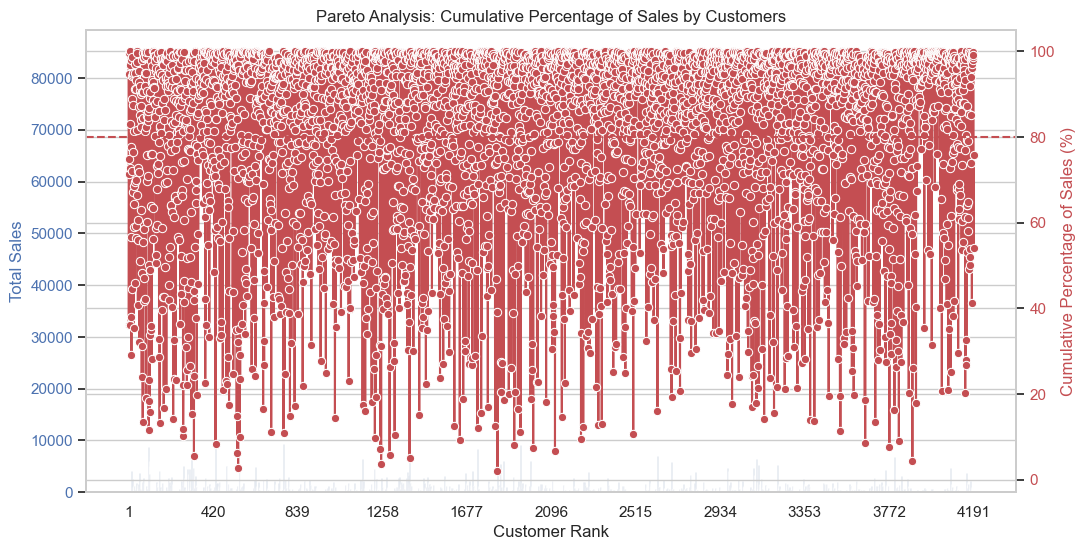

In [27]:
# aggregating total sales by CustomerID
sales_by_customer = retail_df.groupby('CustomerID')['Amount'].sum().reset_index()

# sorting by sales and calculating cumulative percentage
sales_by_customer = sales_by_customer.sort_values(by='Amount', ascending=False)
sales_by_customer['Cum_Percent'] = sales_by_customer['Amount'].cumsum() / sales_by_customer['Amount'].sum() * 100

# plot the Pareto chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# bar plot for total sales
sns.barplot(x=sales_by_customer.index, y='Amount', data=sales_by_customer, ax=ax1, color='b', alpha=0.6, label='Total Sales')
ax1.set_xlabel('Customer Rank')
ax1.set_ylabel('Total Sales', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# line plot for cumulative percentage
ax2 = ax1.twinx()
sns.lineplot(x=sales_by_customer.index, y='Cum_Percent', data=sales_by_customer, color='r', marker='o', ax=ax2)
ax2.axhline(80, color='r', linestyle='--')
ax2.set_ylabel('Cumulative Percentage of Sales (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# set x-axis ticks and title
ax1.set_xticks(range(0, len(sales_by_customer), max(1, len(sales_by_customer)//10)))
ax1.set_xticklabels(range(1, len(sales_by_customer)+1, max(1, len(sales_by_customer)//10)))
plt.title('Pareto Analysis: Cumulative Percentage of Sales by Customers')

plt.show()

**Inference:**

Based on the Pareto chart, a small percentage of customers contribute significantly to overall sales. 

* **Concentration:** The majority of total sales are generated by a relatively small number of customers, as indicated by the rapid increase in the cumulative percentage of sales with a relatively small number of customers.
* **Long Tail:** There is a long tail of customers who contribute to a much smaller portion of total sales, resulting in a gradual increase in the cumulative percentage of sales as more customers are considered.

This analysis suggests that focusing on retaining and acquiring high-value customers could be a strategic approach to maximizing sales revenue.


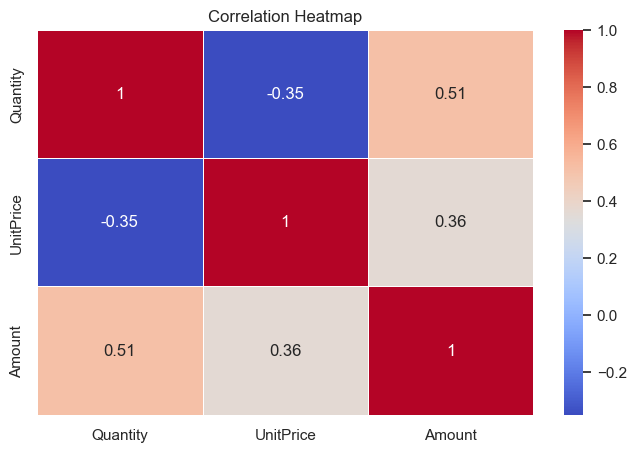

In [28]:
# Calculate the correlation matrix
corr_matrix = retail_df[['Quantity', 'UnitPrice', 'Amount']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Inference:**

Based on the correlation heatmap:

* **Quantity and Amount:** There is a strong positive correlation between Quantity and Amount, which is expected as the total amount is calculated by multiplying the quantity by the unit price.
* **Quantity and UnitPrice:** There is a weak negative correlation between Quantity and UnitPrice. This might suggest that when more items are purchased, the unit price tends to be slightly lower. However, this correlation is not very strong, and other factors could be influencing the relationship.
* **UnitPrice and Amount:** There is a moderate positive correlation between UnitPrice and Amount. This indicates that higher unit prices generally lead to higher total amounts, but the relationship is not as strong as the one between Quantity and Amount.

Overall, the heatmap confirms the expected relationships between the variables, with a strong positive correlation between Quantity and Amount being the most notable finding.


- **Exploratory Data Analysis reveals distinct customer segments and sales trends. Descriptive statistics and distribution plots show varied purchasing behaviors, from bulk buyers to high-spending customers. The top 10 products highlight key revenue drivers, suggesting that focusing on popular items can optimize sales. Time-based analysis uncovers seasonal patterns and peak periods, indicating where marketing efforts could be intensified. The geographic distribution shows a strong presence in the UK, with potential for growth in other countries. Pareto analysis underscores that a small group of high-value customers significantly impacts sales, emphasizing the need for targeted retention strategies. Overall, these insights can help tailor marketing efforts, improve inventory management, and enhance customer engagement.**

## Data Preparation for Modeling

To prepare the data for clustering, we adopt the RFM (Recency, Frequency, Monetary) model, which segments customers based on their purchasing behavior.

### RFM Metrics

- **Recency (R)**: Number of days since the customer's last purchase.
- **Frequency (F)**: Number of transactions made by the customer.
- **Monetary (M)**: Total amount spent by the customer.

### Calculating RFM Metrics

1. **Monetary**: Calculated by summing the `Amount` for each `CustomerID`.
2. **Frequency**: Calculated by counting the number of `InvoiceNo` entries for each `CustomerID`.
3. **Recency**: Calculated by finding the difference in days between the last purchase date and the maximum purchase date in the dataset.

### Outlier Treatment

Outliers can significantly affect clustering results. We apply the Interquartile Range (IQR) method to remove statistical outliers in `Amount`, `Frequency`, and `Recency`.

### Feature Scaling

Clustering algorithms like K-Means are sensitive to the scale of data. We standardize the RFM features using `StandardScaler` to ensure each feature contributes equally to the distance calculations.


In [29]:
# monetary
monetary = retail_df.groupby('CustomerID')['Amount'].sum()
monetary = monetary.reset_index()
monetary.head()

,CustomerID,Amount
0,12347.0,3314.73
1,12348.0,90.20
2,12349.0,999.15
3,12350.0,294.40
4,12352.0,1130.94


- **The monetary value represents the total revenue contributed by each customer. This is an important feature for segmentation.**



In [30]:
# frequency
frequency = retail_df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.columns = ['CustomerID', 'Frequency']
frequency.head()

,CustomerID,Frequency
0,12347.0,166
1,12348.0,6
2,12349.0,58
3,12350.0,16
4,12352.0,66


- **Transaction frequency is another key feature that helps us understand customer behavior. Frequent transactions often signify engagement.**

In [31]:
# merge the two dataframes
group_df = pd.merge(monetary, frequency, on='CustomerID', how ='inner')
group_df.head()

,CustomerID,Amount,Frequency
0,12347.0,3314.73,166
1,12348.0,90.20,6
2,12349.0,999.15,58
3,12350.0,294.40,16
4,12352.0,1130.94,66


In [32]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [33]:
# recency
# convert InvoiceDate to datetime

retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], format = '%d-%m-%Y %H:%M')

In [34]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [35]:
# compute the max date
max_date = max(retail_df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [36]:
# compute the difference
retail_df['diff'] = max_date - retail_df['InvoiceDate']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [37]:
# recency
recency = retail_df.groupby('CustomerID')['diff'].min()
recency = recency.reset_index()
recency.head()

,CustomerID,diff
0,12347.0,1 days 20:58:00
1,12348.0,248 days 02:03:00
2,12349.0,18 days 02:59:00
3,12350.0,309 days 20:49:00
4,12352.0,35 days 22:13:00


- **Recency helps measure customer activity. A lower recency score indicates recent purchases, which may suggest higher engagement.**



In [38]:
# now merge it with the group dataframe
group_df = pd.merge(group_df, recency, on='CustomerID', how='inner')
group_df.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
group_df.head()

,CustomerID,Amount,Frequency,Recency
0,12347.0,3314.73,166,1 days 20:58:00
1,12348.0,90.20,6,248 days 02:03:00
2,12349.0,999.15,58,18 days 02:59:00
3,12350.0,294.40,16,309 days 20:49:00
4,12352.0,1130.94,66,35 days 22:13:00


In [39]:
# select number of days only from recency
group_df['Recency'] = group_df['Recency'].dt.days
group_df.head()

,CustomerID,Amount,Frequency,Recency
0,12347.0,3314.73,166,1
1,12348.0,90.20,6,248
2,12349.0,999.15,58,18
3,12350.0,294.40,16,309
4,12352.0,1130.94,66,35


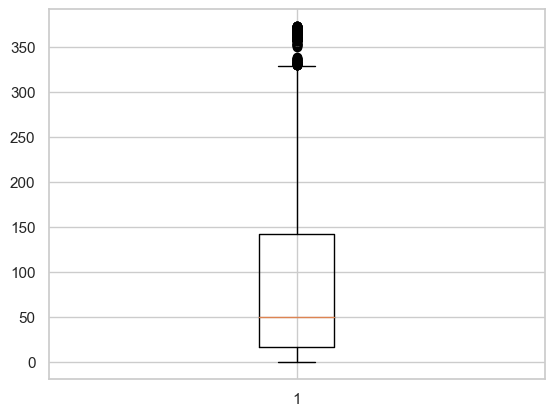

In [40]:
# 1. Outlier treatment
plt.boxplot(group_df['Recency'])
plt.show()

- **The box plot indicates a median value around 100 with a significant number of outliers, suggesting a skewed distribution with a concentration of values near the median but with some extreme values present.**

In [41]:
# removing (statistical) outliers
Q1 = group_df.Amount.quantile(0.05)
Q3 = group_df.Amount.quantile(0.95)
IQR = Q3 - Q1
group_df = group_df[(group_df.Amount >= Q1 - 1.5*IQR) & (group_df.Amount <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = group_df.Recency.quantile(0.05)
Q3 = group_df.Recency.quantile(0.95)
IQR = Q3 - Q1
group_df = group_df[(group_df.Recency >= Q1 - 1.5*IQR) & (group_df.Recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = group_df.Frequency.quantile(0.05)
Q3 = group_df.Frequency.quantile(0.95)
IQR = Q3 - Q1
group_df = group_df[(group_df.Frequency >= Q1 - 1.5*IQR) & (group_df.Frequency <= Q3 + 1.5*IQR)]

- **Removing outliers helps in improving the clustering results by reducing the impact of extreme values.**

In [42]:
# rescaling
rfm_df = group_df[['Amount', 'Frequency', 'Recency']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4141, 3)

- **Standardization is crucial for clustering algorithms like K-Means, which are distance-based. All features are rescaled to ensure equal importance.**

In [43]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,2.100652,1.168732,-0.914675
1,-0.694066,-0.711524,1.554242
2,0.093726,-0.100441,-0.744749
3,-0.517085,-0.594008,2.163974
4,0.207949,-0.006428,-0.574824


## Clustering Modeling

With the prepared RFM data, we apply clustering algorithms to segment the customers into distinct groups based on their purchasing behavior.

### K-Means Clustering

K-Means is a popular clustering algorithm that partitions data into `k` clusters by minimizing the sum of squared distances between data points and their respective cluster centroids.

#### Finding the Optimal Number of Clusters

To determine the optimal number of clusters (`k`), we use two methods:
- **Elbow Method (Sum of Squared Distances - SSD)**
- **Silhouette Analysis**

### Hierarchical Clustering

Hierarchical clustering builds a tree-like structure (dendrogram) to represent nested clusters. It allows us to visualize the merging of clusters and decide on the appropriate number of clusters.

#### Linkage Methods

- **Single Linkage**: Clusters are merged based on the shortest distance between points in different clusters.
- **Complete Linkage**: Clusters are merged based on the farthest distance between points in different clusters.


In [44]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [45]:
kmeans.labels_

array([1, 2, 0, ..., 2, 0, 0])

### Finding the Optimal Number of Clusters

### SSD

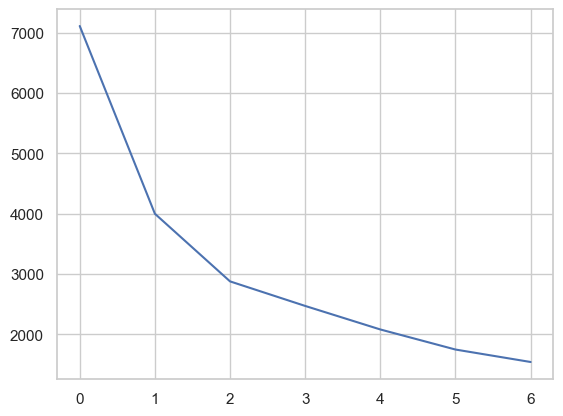

In [46]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [47]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.542778483439819
For n_clusters=3, the silhouette score is 0.5101754400853808
For n_clusters=4, the silhouette score is 0.48843829537492967
For n_clusters=5, the silhouette score is 0.4823653200818725
For n_clusters=6, the silhouette score is 0.42682432187085745
For n_clusters=7, the silhouette score is 0.408782528560002
For n_clusters=8, the silhouette score is 0.41057370828218764


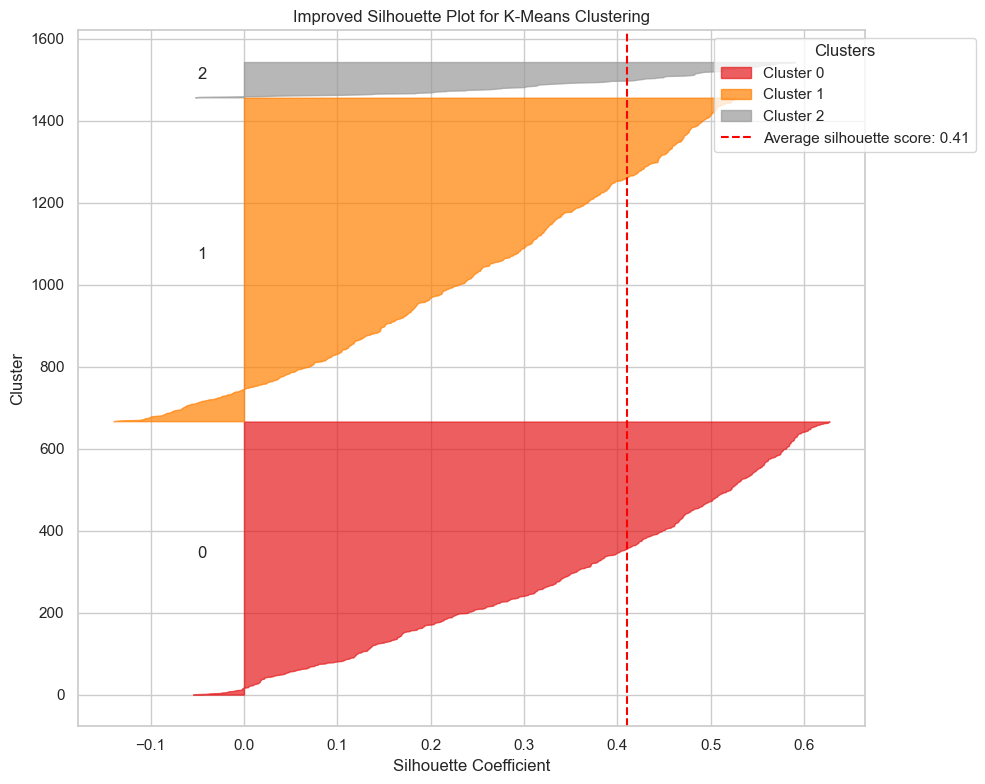

In [48]:
def plot_silhouette(X, labels, n_clusters):
    """
    Plot the silhouette plot for the given data and cluster labels with color-coded clusters.
    
    Parameters:
    - X: The data used for clustering.
    - labels: The cluster labels for each data point.
    - n_clusters: The number of clusters.
    """
    # compute the silhouette scores for each sample
    silhouette_vals = silhouette_samples(X, labels)
    
    # create a figure for the plot
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # define a colormap for the clusters
    cmap = cm.get_cmap("Set1", n_clusters)
    
    y_lower = 0
    colors = []  # to store colors used for clusters
    for i in range(n_clusters):
        # select the silhouette scores for the current cluster
        ith_cluster_silhouette_vals = silhouette_vals[labels == i]
        ith_cluster_silhouette_vals.sort()

        # compute the size of the cluster
        size_cluster_i = ith_cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        # choose a color for this cluster
        color = cmap(i)
        colors.append(color)
        
        # plot the silhouette scores for this cluster, with the color for the cluster
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_vals,
                         facecolor=color, edgecolor=color, alpha=0.7, label=f'Cluster {i}')

        # label the silhouette plots with the cluster numbers in the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for the next plot
        y_lower = y_upper

    # red dashed line for average silhouette score
    mean_silhouette_score = np.mean(silhouette_vals)
    ax.axvline(x=mean_silhouette_score, color="red", linestyle="--",
               label=f'Average silhouette score: {mean_silhouette_score:.2f}')

    # set the labels and title
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_ylabel("Cluster")
    ax.set_title("Improved Silhouette Plot for K-Means Clustering")

    # add the legend outside the plot, mapping colors to clusters
    ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0), title="Clusters")

    # adjust layout for better display
    plt.tight_layout()
    plt.show()

# example usage with your data
plot_silhouette(rfm_df_scaled, kmeans.labels_, n_clusters=3)

- **The function `plot_silhouette` generates a silhouette plot to visualize the clustering results, showing how well each point fits within its cluster.**

## Cluster Interpretation and Visualization

After clustering, it's essential to interpret the resulting segments to understand the characteristics of each customer group.

### K-Means Cluster Analysis

We analyze the clusters formed by K-Means based on RFM metrics to identify distinct customer segments.

### Hierarchical Clustering Analysis

Similarly, we interpret the clusters formed through hierarchical clustering to compare with K-Means results.

### Visualizing Clusters

Boxplots and other visualizations help in comparing the distribution of RFM metrics across different clusters, providing insights into customer behavior patterns.


In [49]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [50]:
kmeans.labels_

array([1, 2, 0, ..., 2, 0, 0])

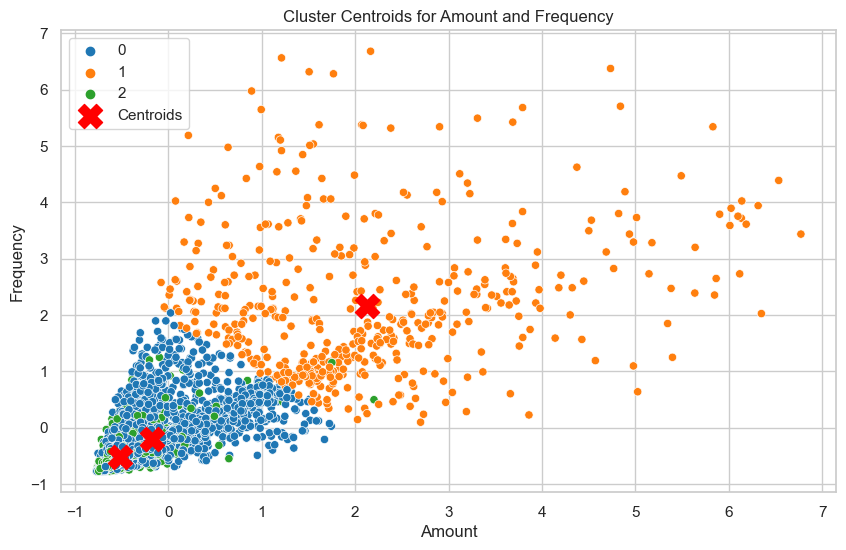

In [51]:
# convert DataFrame to numpy array
rfm_df_scaled_np = rfm_df_scaled.to_numpy()

# assuming centroids have shape (3, 3)
# create a DataFrame for centroids with the correct column names
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=['Amount', 'Frequency', 'Recency'])

# create a DataFrame for plotting
plot_df = pd.DataFrame(rfm_df_scaled_np, columns=['Amount', 'Frequency', 'Recency'])
plot_df['Cluster'] = kmeans.labels_

# plot clusters and centroids
plt.figure(figsize=(10, 6))

# scatter plot of the clusters
sns.scatterplot(x=plot_df['Amount'], y=plot_df['Frequency'], hue=plot_df['Cluster'], palette='tab10')

# scatter plot of centroids
plt.scatter(centroid_df['Amount'], centroid_df['Frequency'], s=300, c='red', marker='X', label='Centroids')

plt.title('Cluster Centroids for Amount and Frequency')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

- **The scatter plot illustrates the distribution of data points (likely customers) in a two-dimensional space defined by `Amount` and `Frequency`. The three distinct clusters (0, 1, and 2) are visually apparent. The red 'x' markers represent the centroids of each cluster, indicating the central tendency of data points within that cluster. The visualization suggests that customers can be grouped into segments based on their spending habits `Amount` and purchase frequency `Frequency`.**

In [52]:
# assign the label
group_df['Cluster_ID'] = kmeans.labels_
group_df.head()

,CustomerID,Amount,Frequency,Recency,Cluster_ID
0,12347.0,3314.73,166,1,1
1,12348.0,90.20,6,248,2
2,12349.0,999.15,58,18,0
3,12350.0,294.40,16,309,2
4,12352.0,1130.94,66,35,0


<Axes: xlabel='Cluster_ID', ylabel='Amount'>

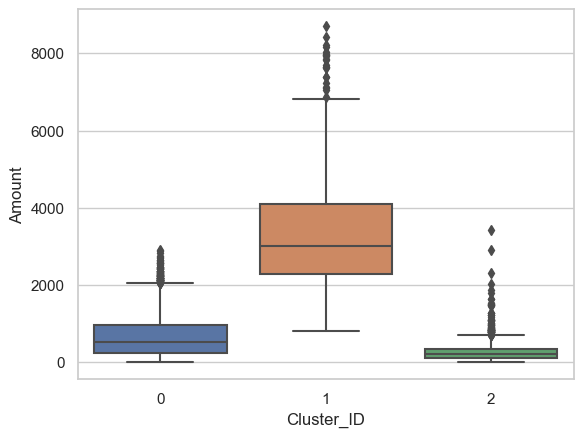

In [53]:
# plot
sns.boxplot(x='Cluster_ID', y='Amount', data=group_df)

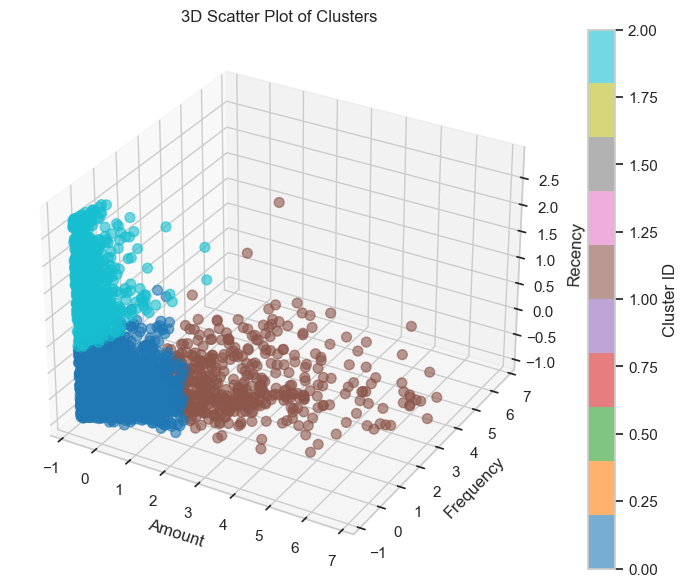

In [54]:
from mpl_toolkits.mplot3d import Axes3D

# initialize the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# plot the 3D scatter plot
sc = ax.scatter(rfm_df_scaled_np[:, 0], rfm_df_scaled_np[:, 1], rfm_df_scaled_np[:, 2], 
                c=kmeans.labels_, cmap='tab10', s=50, alpha=0.6)

# set labels and title
ax.set_xlabel('Amount')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Clusters')

# add a color bar
plt.colorbar(sc, ax=ax, label='Cluster ID')
plt.show()

- **The 3D scatter plot reveals distinct clusters in the data based on `Recency`, `Frequency`, and `Amount`. The visualization suggests that customers can be grouped into several segments with varying levels of recency, frequency, and spending habits.**


### Hierarchical Clustering

In [55]:
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,2.100652,1.168732,-0.914675
1,-0.694066,-0.711524,1.554242
2,0.093726,-0.100441,-0.744749
3,-0.517085,-0.594008,2.163974
4,0.207949,-0.006428,-0.574824


In [56]:
group_df.head()

,CustomerID,Amount,Frequency,Recency,Cluster_ID
0,12347.0,3314.73,166,1,1
1,12348.0,90.20,6,248,2
2,12349.0,999.15,58,18,0
3,12350.0,294.40,16,309,2
4,12352.0,1130.94,66,35,0


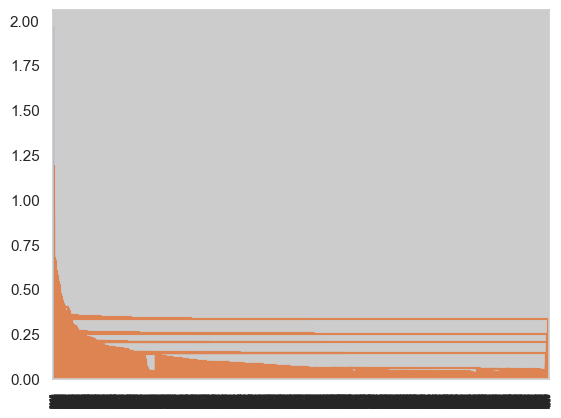

In [57]:
# single linkage
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

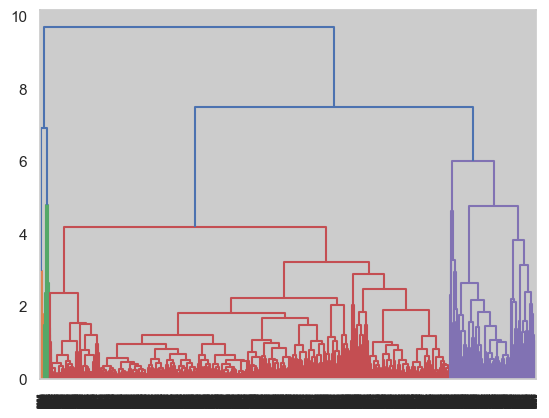

In [58]:
# complete linkage
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

- **This block performs hierarchical clustering using single and complete linkage methods and visualizes the results with dendrograms. It then assigns cluster labels and compares these with K-Means results.**

In [59]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, ..., 1, 1, 1])

In [60]:
# assign cluster labels
group_df['Cluster_labels'] = cluster_labels
group_df.head()

,CustomerID,Amount,Frequency,Recency,Cluster_ID,Cluster_labels
0,12347.0,3314.73,166,1,1,0
1,12348.0,90.20,6,248,2,1
2,12349.0,999.15,58,18,0,1
3,12350.0,294.40,16,309,2,1
4,12352.0,1130.94,66,35,0,1


### Cluster Profiles and Key Insights

In [61]:
# calculate the average of key features for each cluster
cluster_profiles = group_df.groupby('Cluster_labels').agg({
    'Amount': 'mean',
    'Frequency': 'mean',
    'Recency': 'mean'}).reset_index()

# rename columns for better understanding
cluster_profiles.columns = ['Cluster', 'Avg_Spending', 'Avg_Frequency', 'Avg_Recency']

# display the cluster profiles
print(cluster_profiles)

   Cluster  Avg_Spending  Avg_Frequency  Avg_Recency
0        0   2462.564763     169.762570    24.283520
1        1    457.125073      35.634569   108.991926
2        2   4911.709753     430.358025    15.037037


**We have created customer profiles for each cluster based on average spending, purchase frequency, and recency of purchases.**


- **Cluster 0**: These are high-value customers with occasional but significant purchases. This group should be prioritized with loyalty programs or exclusive offers to increase retention.
- **Cluster 1**: These customers purchase frequently but tend to spend less. Marketing efforts could focus on increasing the average order value through upselling or cross-selling strategies.
- **Cluster 2**: Moderate-frequency buyers with average spending. A balanced approach to retention and upselling may be effective here.


<Axes: xlabel='Cluster_labels', ylabel='Recency'>

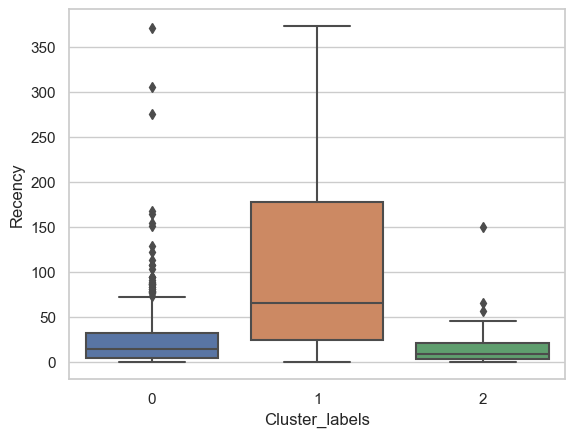

In [62]:
# plots
sns.boxplot(x='Cluster_labels', y='Recency', data=group_df)

<Axes: xlabel='Cluster_labels', ylabel='Frequency'>

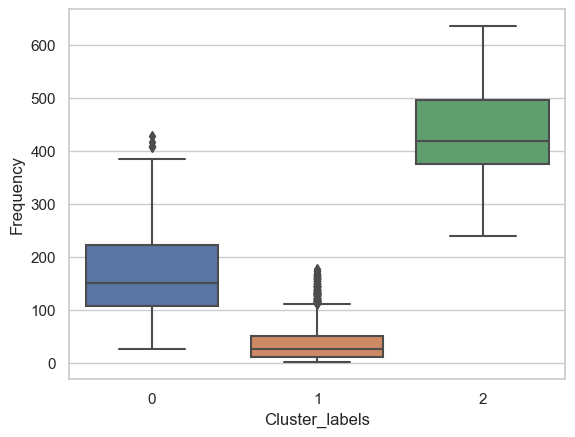

In [63]:
# plots
sns.boxplot(x='Cluster_labels', y='Frequency', data=group_df)

<Axes: xlabel='Cluster_labels', ylabel='Amount'>

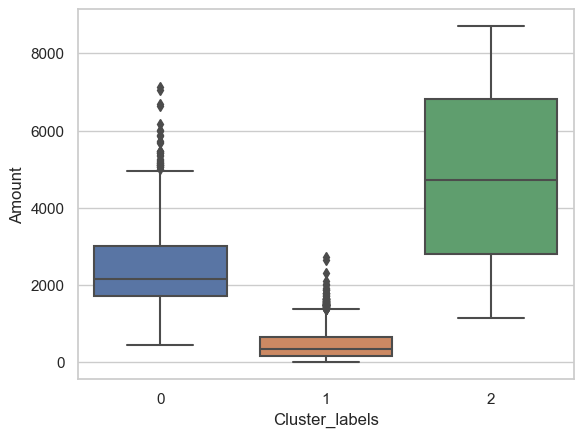

In [64]:
# plots
sns.boxplot(x='Cluster_labels', y='Amount', data=group_df)

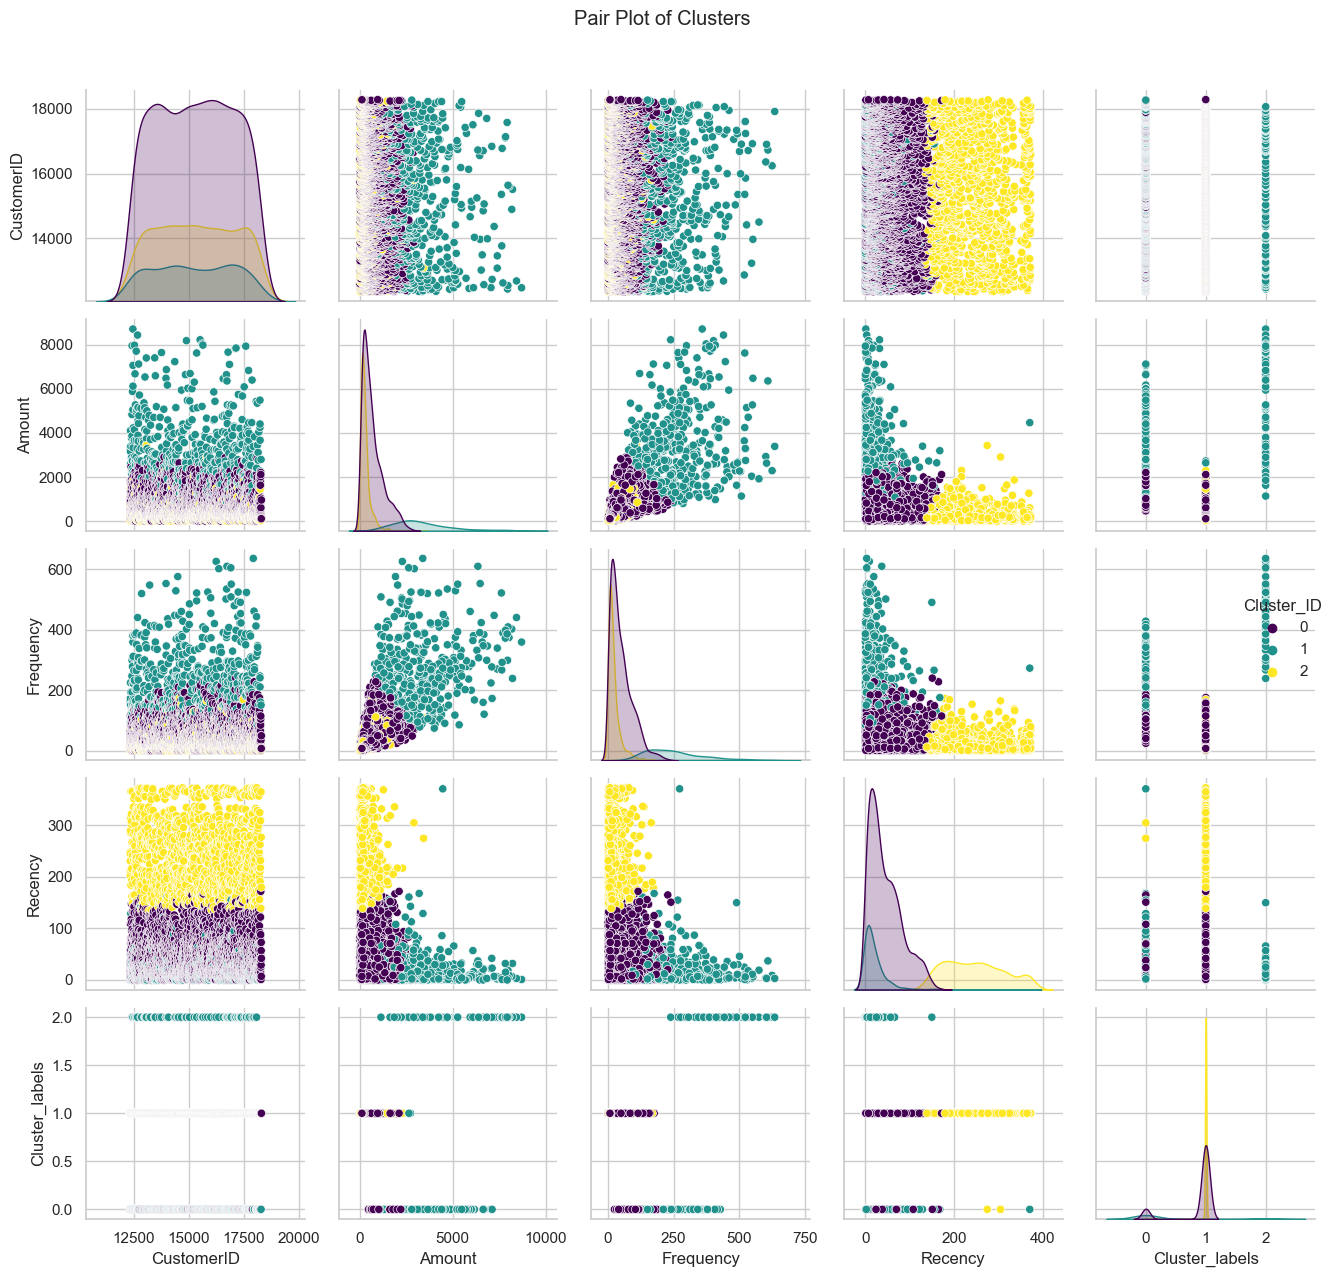

In [65]:
def plot_pair_plot_with_title(df, hue, title):
    """
    Plot a pair plot with a title above the plot.

    Parameters:
    - df: The DataFrame containing the data.
    - hue: The name of the column to use for color encoding.
    - title: The title to display above the plot.
    """
    # create the pair plot
    pair_plot = sns.pairplot(df, hue=hue, palette='viridis')
    plt.suptitle(title, y=1.02)
    plt.tight_layout()
    plt.show()

# example usage
plot_pair_plot_with_title(group_df, hue='Cluster_ID', title='Pair Plot of Clusters')

**The pair plot shows the relationships between different variables and how they cluster together. Here are some key inferences:**

1. **Cluster Separation**: The plot reveals distinct clusters, indicating that the data can be grouped into different categories based on the variables.
2. **Variable Relationships**: Some scatter plots show clear patterns or correlations between variables, suggesting strong relationships.
3. **Distribution**: The histograms along the diagonal indicate the distribution of each variable, showing how data points are spread within each cluster.
4. **Outliers**: Any points that fall far from the main clusters could be potential outliers, which might need further investigation.

**This visualization is useful for understanding the structure and relationships within the dataset.**

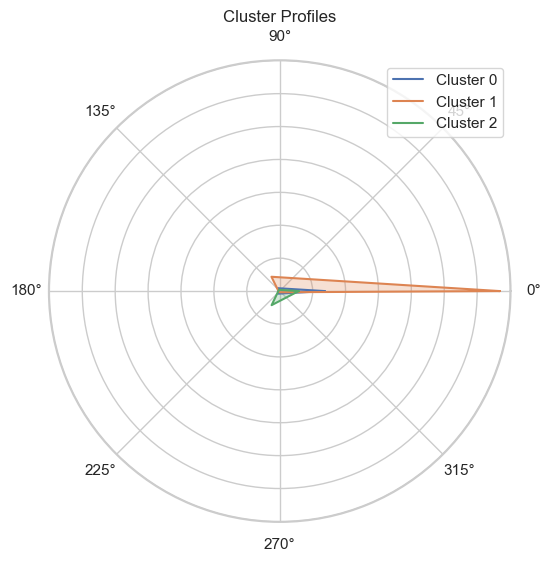

In [66]:
cluster_profile = group_df.groupby('Cluster_ID').mean()[['Amount', 'Frequency', 'Recency']]

# Radar plot function
def radar_plot(data, labels):
    N = data.shape[1]
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    data = np.concatenate((data, data[:, [0]]), axis=1)
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    for idx, row in enumerate(data):
        ax.plot(angles, row, label=f'Cluster {labels[idx]}')
        ax.fill(angles, row, alpha=0.25)
    ax.set_yticklabels([])
    plt.title('Cluster Profiles')
    ax.legend()
    plt.show()

radar_plot(cluster_profile.values, cluster_profile.index)

- **The radar plot function visualizes the profiles of clusters based on average RFM metrics, providing a comparative view of cluster characteristics.**

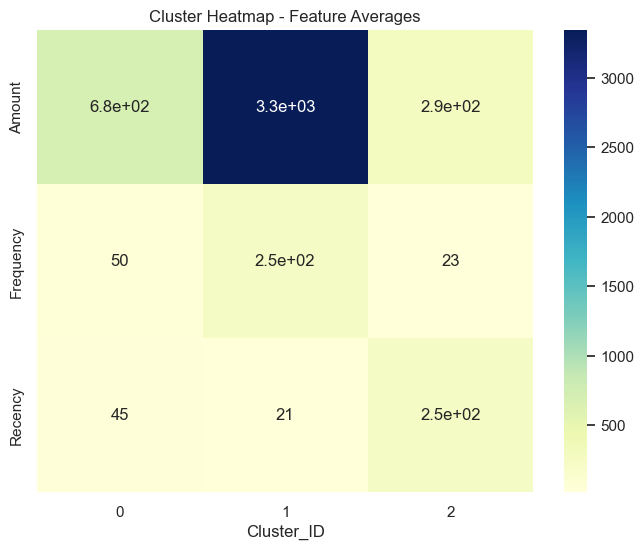

In [67]:
# calculate average feature values for each cluster
cluster_averages = group_df.groupby('Cluster_ID')[['Amount', 'Frequency', 'Recency']].mean()

# plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_averages.T, annot=True, cmap="YlGnBu")
plt.title('Cluster Heatmap - Feature Averages')
plt.show()

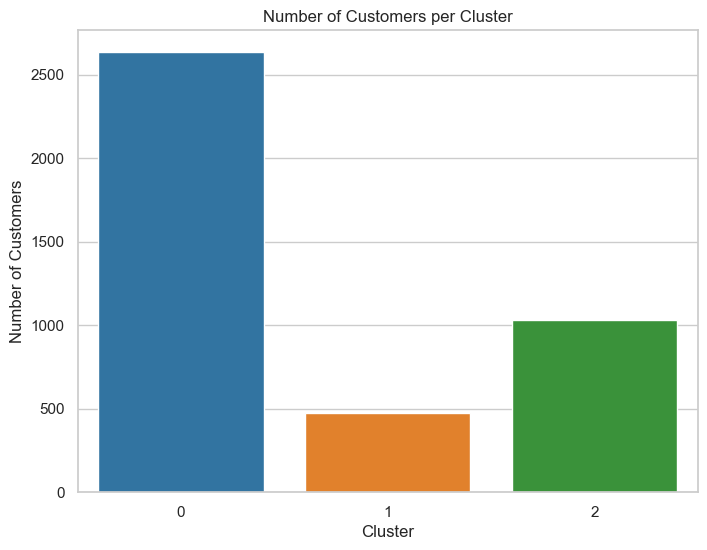

In [68]:
# count customers in each cluster
cluster_counts = group_df['Cluster_ID'].value_counts().reset_index()
cluster_counts.columns = ['Cluster_ID', 'Count']

# plot a stacked bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster_ID', y='Count', data=cluster_counts, palette='tab10')
plt.title('Number of Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

- **These plots provide a heatmap of average feature values for each cluster and a bar chart showing the number of customers in each cluster.**

## **Conclusion**

### **Overview**
In this project, we performed customer segmentation using **K-Means** and **Hierarchical Clustering** on a dataset containing customer purchase behavior. The main goal was to identify distinct customer groups based on their spending habits, purchase frequency, and recency, thereby enabling the business to tailor its marketing and sales strategies to these unique segments. By understanding these customer clusters, the business can improve customer satisfaction, increase revenue, and optimize marketing efforts.

### **Key Findings & Insights**
After analyzing the dataset and applying clustering algorithms, we identified several distinct customer segments with varying behaviors:

1. **High-Spending, Low-Frequency Customers**: These customers make large purchases but do so infrequently. They represent significant value but are less engaged on a monthly basis.
2. **Low-Spending, High-Frequency Customers**: This group makes frequent purchases, but their average spending per transaction is low. They are highly engaged, yet their contribution to overall revenue is limited.
3. **Moderate-Spending, Infrequent Customers**: Customers in this segment make moderate purchases but are not consistent in their shopping behavior. They show signs of losing interest and are at risk of churn.
4. **New or Low-Engagement Customers**: These customers have made very few purchases and show low engagement, needing extra attention to convert into loyal buyers.
5. **High-Spending, High-Frequency Customers (VIPs)**: This segment includes the most valuable customers who spend significantly and shop often. Retaining these customers is crucial for sustaining long-term revenue.
6. **Geographical Insights**: Customers were predominantly from the UK, but significant purchasing behavior was also noted from a few other countries.
7. **High-Value Customers**: A small subset of customers contributed to a large proportion of the revenue, emphasizing the importance of focusing on high-value customer retention.

### **Recommendations**
Based on the insights from the clusters, we propose the following recommendations for the business:

- **High-Spending, Low-Frequency Customers**: Implement a **VIP loyalty program** offering exclusive rewards, early product access, and personalized offers to drive higher engagement and increase purchase frequency.
- **Low-Spending, High-Frequency Customers**: Encourage higher spending per transaction through **bundling, upselling, and cross-selling** strategies, offering deals like "Buy More, Save More" or "Free Shipping on Purchases Over $X."
- **Moderate-Spending, Infrequent Customers**: Focus on **re-engagement campaigns** to bring them back into the sales cycle. Seasonal promotions, targeted ads, and personalized product recommendations can reignite their interest.
- **New or Low-Engagement Customers**: Use **welcome emails** and offer **first-purchase discounts** to convert these customers into repeat buyers. Follow up with personalized offers and reminders if they haven't purchased recently.
- **High-Spending, High-Frequency Customers (VIPs)**: Create **exclusive, invite-only events** or product previews, ensuring these loyal customers feel valued and incentivized to continue their high engagement with the brand.
- **Customer Retention Focus**: Given the high revenue contribution of a small customer base, enhancing retention strategies for high-value customers should be prioritized. This could involve **special loyalty rewards, personalized communication, and better customer service**.
- **Expansion Opportunities**: The business could explore targeted marketing in countries showing potential for higher sales based on the analysis, such as **focusing more on regions outside the UK** that show promising behavior.
- **Stock and Inventory Management**: Based on purchasing patterns, the business could optimize **stock levels**, especially for products purchased frequently by high-value customers, reducing the risk of stockouts.

#### **Business Implications**
By implementing these recommendations, the business stands to benefit in several ways:
- **Increased Customer Retention**: Focused retention strategies will reduce churn rates, especially among high-value customers.
- **Revenue Growth**: Upselling and cross-selling to frequent buyers will increase the average order value, boosting overall revenue.
- **Improved Customer Experience**: Tailoring marketing and offers based on customer segment behavior enhances the customer experience, fostering brand loyalty.
- **Optimized Marketing Spend**: By targeting specific customer groups with relevant offers, the business can reduce marketing waste and improve return on investment (ROI).

### **Limitations**
While the clustering analysis provides valuable insights, several limitations exist:
- **Static Data**: The segmentation is based on historical data, and customer behavior can change over time. Periodic updates to the clustering model are necessary to maintain relevance.
- **Feature Selection**: The clustering used only a few features (spending, frequency, recency). Incorporating more data points, such as customer demographics, product preferences, or social media engagement, could lead to more refined and accurate clusters.
- **Interpretation Ambiguity**: While clustering identifies patterns, interpreting those patterns into actionable business insights can be subjective and requires domain expertise.

### **Concluding Thoughts**
This customer segmentation analysis provides a clear path for the business to tailor its marketing strategies based on distinct customer behaviors. By recognizing the unique needs and characteristics of each cluster, the business can implement targeted campaigns, improve customer retention, and maximize revenue. While the analysis has its limitations, it offers a strong foundation for data-driven decision-making. Future work could involve enhancing the model with additional features, periodically updating the segmentation, and integrating real-time customer behavior to ensure ongoing relevance.

With these strategies in place, the business is better equipped to deliver personalized, impactful customer experiences, ultimately driving growth and long-term success.